In [1]:
import numpy as np
from numpy import pi as π
from numpy.fft import rfft, irfft, rfftfreq
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['font.size'] = 18

In [2]:
ν = 0.001  # Diffusion constant
L = 20     # Length of domain
N = 1000   # Number of discretization points
dx = L / N
x = np.arange(-L/2, L/2, dx) # Define x domain

# Define discrete wavenumbers
κ = 2*π * rfftfreq(N, d=dx)

# Initial condition (u = sech(x))
u0 = 1 / np.cosh(x)

# Simulate PDE in spatial domain
dt = 0.025
t = np.arange(0, 100*dt, dt)

# Right hand side of Berger's Equation (in spatial domain)
def rhs_burgers(u, t, κ, ν):
    # spectral derivatives
    û = rfft(u)
    dû = 1j * κ * û
    ddû = -κ**2 * û
    du = irfft(dû)
    ddu = irfft(ddû)
    return -u * du + ν * ddu

u = odeint(rhs_burgers, u0, t, args=(κ, ν))

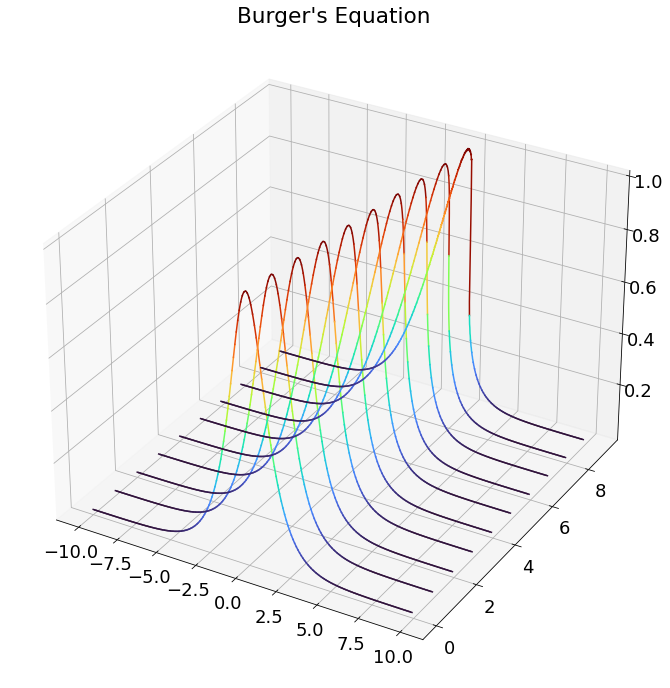

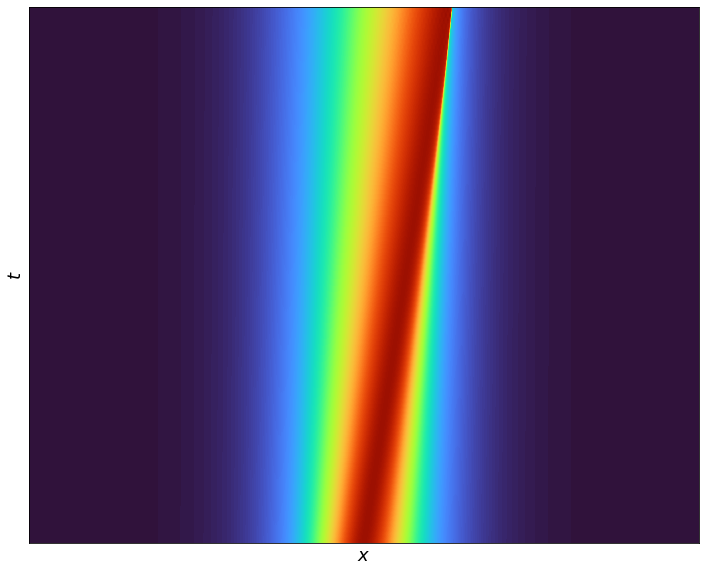

In [3]:
# Waterfall plot
# Figure 2.18

def plot_coloured_line(ax, x, y, z, cmap=plt.cm.turbo, nsteps=200):
    z_normed = (z - z.min()) / (z.max() - z.min())
    step = len(z) // nsteps
    steps = np.arange(0, len(z), step)
    for start, stop in zip(steps[:-1], steps[1:]):
        ax.plot(
            x[start:stop+1],
            y[start:stop+1],
            z[start:stop+1],
            color=cmap(z_normed[(start+stop)//2])
        )

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='3d'))
u_plot = u[0:-1:10, :]
for j in range(u_plot.shape[0]):
    ys = j * np.ones(u_plot.shape[1])
    plot_coloured_line(ax, x, ys, u_plot[j, :])
    ax.set_title("Burger's Equation")
    
# Image plot
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(np.flipud(u), aspect=8, cmap='turbo')
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_xlabel('$x$')
ax.set_ylabel('$t$');